<a href="https://colab.research.google.com/github/Sohyla03Said/feature-extraction-and-matching/blob/main/keypoint%20matched.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python opencv-contrib-python

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
query_img_color = cv2.imread('/content/Screenshot 2025-04-19 200004.png')     # object image
target_img_color = cv2.imread('/content/fresh-vegetables-vegetable-icon-vegan-food-cucumber-tomato-broccoli-eggplant-cabbage-peppers-peas-carrots-onions-vector-icons-85278849.webp')  # scene image

In [10]:
query_img_gray = cv2.cvtColor(query_img_color, cv2.COLOR_BGR2GRAY)
target_img_gray = cv2.cvtColor(target_img_color, cv2.COLOR_BGR2GRAY)

In [11]:
# Use SIFT (requires opencv-contrib-python)
sift = cv2.SIFT_create()

# OR use ORB (free and faster)
# orb = cv2.ORB_create()

In [12]:
kp1, des1 = sift.detectAndCompute(query_img_gray, None)
kp2, des2 = sift.detectAndCompute(target_img_gray, None)

In [13]:
# FLANN matcher parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# Create matcher and find matches
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

In [14]:
# Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

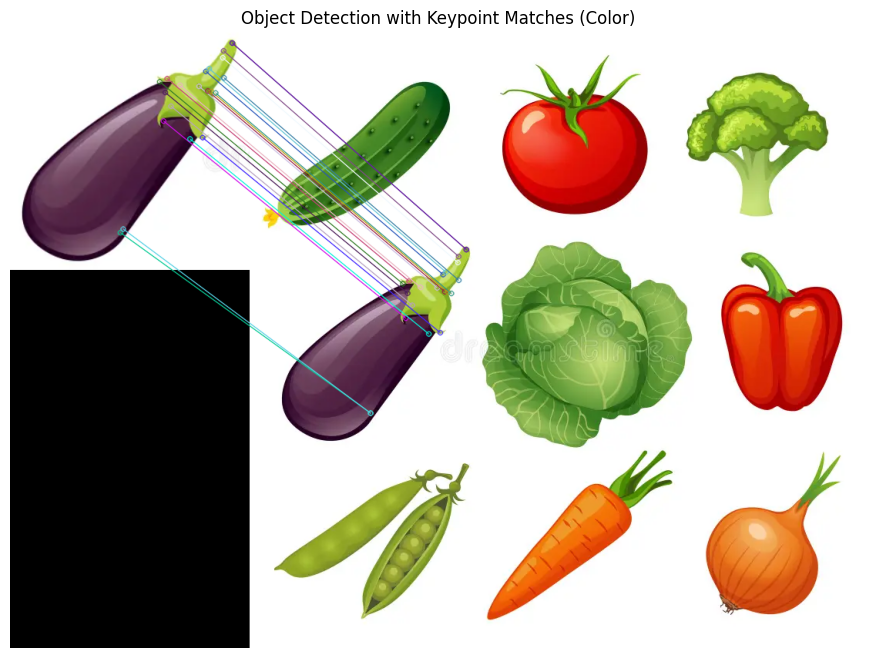

In [15]:
# Draw matches using color images
matched_img = cv2.drawMatches(query_img_color, kp1, target_img_color, kp2, good_matches, None,
                               flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert BGR to RGB for Matplotlib
matched_img_rgb = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

# Show result
plt.figure(figsize=(16, 8))
plt.imshow(matched_img_rgb)
plt.title("Object Detection with Keypoint Matches (Color)")
plt.axis('off')
plt.show()